# Milestone project 2:

## Bulldozer Sales Prediction: Kaggle: Blue Book Bulldozer.

### Predicting the Sales price of bulldozer using ML.

* In this Notebook, we are going to go through an example ML project with the goal of predicting the sales priec.

#### 1. Problem Definition
> How well we can predict the future sales of bulldozer, geven it's characteristics and past data of how much similiar bulldozer have been sold.

#### 2. Data:
> Data is downloaded from Kaggle Blue Book of Bulldozer compedition.

https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are three main datasets:

* Train.csv - is the training set, which contains data through the **end of 2011.**

* Valid.csv - is the validation set, which contains data **from January 1, 2012 - April 30, 2012** You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv - is the test set, which won't be released until the last week of the competition. It contains data **from May 1, 2012 - November 2012**. Your score on the test set determines your final rank for the competition.

#### 3. Evaluation.
> The evaluation metric for this competition is the **RMSLE (root mean squared log error)** between the actual and predicted auction prices.

* **NOTE:** The goal for most regression evoluation metrics is to minimize the error. For example, our goal for this project to build a ML model which minimizes the **RMSLE**.

#### 4. Features.

> Kaggle provides a data dictionary which provides detailing of all features of dataset.

#### 5. Modeling.

#### 6. Expiriment.

In [258]:
#Import basic libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
%matplotlib inline

In [259]:
#Import data(TrainAndValid.csv) into dataframe: 
#df_train = pd.read_csv('/Users/arunmac/workspace/DS/all-projects/Zero-Mastery/007 - Milestone_Project2/input/Train.csv')

df = pd.read_csv("/Users/arunmac/workspace/DS/all-projects/Zero-Mastery/007 - Milestone_Project2/input/TrainAndValid.csv"
                ,low_memory=False
                ,parse_dates=['saledate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [260]:
df.sample(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
215646,1680341,14500.0,1330148,8748,132,14.0,1987,NaN,NaN,2002-03-22,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
353626,2421630,85000.0,1639553,28919,136,1.0,2007,0.0,NaN,2008-09-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
310890,2270007,26000.0,1082425,3463,136,1.0,1999,0.0,NaN,2008-06-24,...,None or Unspecified,None or Unspecified,Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
69084,1346197,20000.0,1159917,7013,132,19.0,1984,NaN,NaN,2004-09-23,...,None or Unspecified,"9' 6""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
339677,2355037,32000.0,1720492,1879,136,1.0,2004,1767.0,Medium,2008-09-16,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
142035,1507636,45000.0,1493495,3380,132,19.0,1981,NaN,NaN,2003-12-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164398,1587432,18000.0,1308899,14451,132,1.0,2006,NaN,NaN,2009-09-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111261,1446076,57000.0,1211360,3362,132,1.0,1981,NaN,NaN,1993-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320302,2303012,57000.0,755175,1453,136,1.0,2003,0.0,NaN,2008-06-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
26314,1253768,16000.0,1420542,3170,132,1.0,1987,NaN,NaN,1998-12-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA:

In [261]:
#Check is there any missing values:

df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [262]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

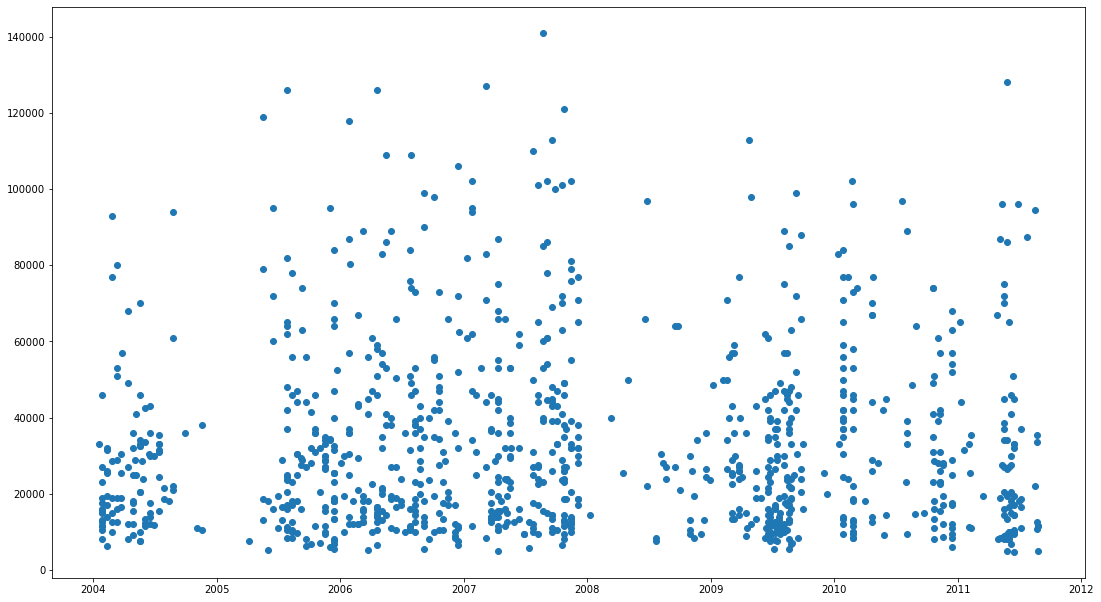

In [263]:
#Visualize the import features:

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])


<AxesSubplot:ylabel='Frequency'>

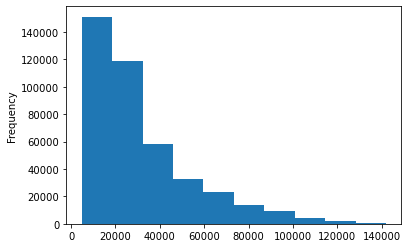

In [264]:
df.SalePrice.plot.hist()

In [265]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883
datasource,121,121,121,121,121,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0,11540.0,4883.0,302.0,20700.0
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00,2008-12-18 00:00:00,2004-08-26 00:00:00,2005-11-17 00:00:00,2009-08-27 00:00:00,2007-08-09 00:00:00


In [266]:
# Rearrange the saledate column to 2 column:

temp = df.pop('saledate')

df.insert(1, 'saledate', temp)

df.head(10).T

,0,1,2,3,4,5,6,7,8,9
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00,2008-12-18 00:00:00,2004-08-26 00:00:00,2005-11-17 00:00:00,2009-08-27 00:00:00,2007-08-09 00:00:00
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883
datasource,121,121,121,121,121,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0,11540.0,4883.0,302.0,20700.0
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium


In [267]:
# Sort the SaleDate:

df.sort_values(by=['saledate'], inplace=True)

df.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [268]:
#make a copy of orginal DF:
df_tmp = df.copy()
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN


### Sort Dateframe by "SaleDate"

When working with Time serious data, it's always good idea to sore it.

In [269]:
#Sort date time column:

df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(5)

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [270]:
df.head(20)

,SalesID,saledate,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,1989-01-17,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
233186,1728883,1989-01-31,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142491,1508502,1989-01-31,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN
115536,1452578,1989-01-31,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
92301,1403418,1989-01-31,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115892,1453054,1989-01-31,36000.0,1117184,3854,132,99.0,1977,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
134080,1491298,1989-01-31,46000.0,1322436,4107,132,99.0,1987,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
92294,1403411,1989-01-31,23000.0,1184544,7110,132,99.0,1986,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31494,1263797,1989-01-31,17000.0,1526902,6953,132,99.0,1983,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
140922,1504404,1989-01-31,26000.0,1310407,4139,132,99.0,1975,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN


### Make a copy of OG dataframe

In [271]:
df_tmp = df.copy()
#df_tmp

## 4. Feature Engineering

In [272]:
# parse the year, month, day from saledate column into new column
df_tmp.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN


In [273]:

df_tmp.insert(1, 'saleYear', df_tmp.saledate.dt.year)
df_tmp.insert(2, 'saleMonth', df_tmp.saledate.dt.month)
df_tmp.insert(3, 'saleDay', df_tmp.saledate.dt.day)
df_tmp.insert(4, 'SaleDayOfWeek', df_tmp.saledate.dt.day_of_week)
df_tmp.insert(5, 'SaleDayOfYear', df_tmp.saledate.dt.day_of_year)


In [274]:
len(dftmp.columns)

103

In [275]:
df_tmp.drop('saledate',axis=1,  inplace=True)
clm_to_move = df_tmp.pop('SalePrice')
df_tmp.insert(len(df_tmp.columns), 'SalePrice', clm_to_move)

In [276]:
df_tmp.sample(10).T

,272659,2503,279595,377627,291847,57619,256486,297643,153183,405195
SalesID,1814234,1147634,1853923,2787927,2210458,1314906,1779158,2233919,1532723,4370743
saleYear,2003,2009,2000,2010,2007,2001,2000,2008,2004,2012
saleMonth,10,5,11,4,8,3,8,3,10,2
saleDay,4,15,10,29,15,16,12,27,30,16
SaleDayOfWeek,5,4,4,3,2,4,5,3,5,3
SaleDayOfYear,277,135,315,119,227,75,225,87,304,47
MachineID,1176103,1060240,1447950,1512024,1768948,1343978,1453885,1734101,1387249,2285652
ModelID,9569,7999,18673,20292,3180,4157,23795,3367,7052,9551
datasource,132,121,132,149,136,132,132,136,132,172
auctioneerID,2.0,3.0,5.0,1.0,NaN,1.0,25.0,NaN,4.0,1.0


In [277]:
# Count a catogery column's unique values:

dftmp  = df_tmp.copy()


dftmp.dtypes

SalesID                       int64
saleYear                      int64
saleMonth                     int64
saleDay                       int64
SaleDayOfWeek                 int64
SaleDayOfYear                 int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                

In [278]:
dftmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

<AxesSubplot:>

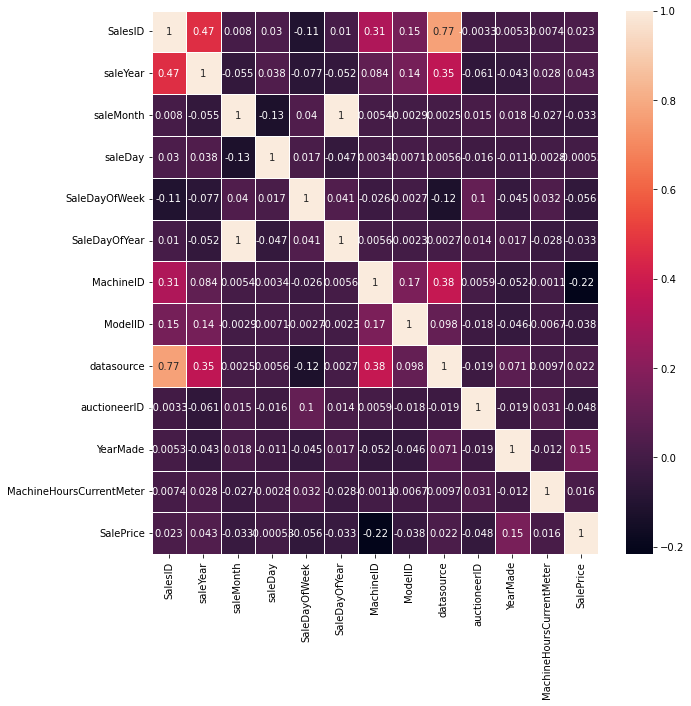

In [279]:
# Correlation matrix

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(dftmp.corr(), annot=True, linewidths=.5, ax=ax)

## 5. Modeling

We done enough EDA(we could always do more) but let's start do model-driven EDA.


In [280]:
# Let's build a machine learning model.

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_jobs=-1, random_state=1234)

X = dftmp.drop('SalePrice', axis=1)
Y = dftmp['SalePrice']

#rfr.fit(X, Y)

In [281]:
# We need to convert String values into int before that we need to deal with missing values.
pd.api.types.is_string_dtype(dftmp['saleMonth'])

False

In [282]:
#Find the Column which is String/object dtypes:

for column, values in dftmp.items():
    if pd.api.types.is_string_dtype(values):
        print(column)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [283]:
dftmp = df_tmp.copy()


In [284]:
# Convert all the object dtpye column into number:
catcol = []
for column, value in dftmp.items():
    if pd.api.types.is_string_dtype(value):
        dftmp[column] = value.astype('category').cat.as_ordered()
        catcol.append(column)
        

In [285]:
#dftmp_catcol.sort()
# print(dftmp_catcol)

dftmp_numcol = dftmp.drop(dftmp[catcol], axis=1)

dftmp_catcol =dftmp[catcol]



<Figure size 1440x720 with 0 Axes>

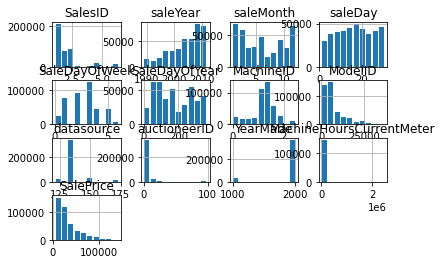

In [286]:
# Visualize Numerical Column
plt.figure(figsize=(20,10))
dftmp_numcol.hist(rwidth=0.8)
plt.show()

In [287]:
dftmp.dtypes

SalesID                        int64
saleYear                       int64
saleMonth                      int64
saleDay                        int64
SaleDayOfWeek                  int64
SaleDayOfYear                  int64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
R

In [288]:
# Calculate missing values in percentage:

dftmp.isnull().sum()/len(dftmp)

SalesID                     0.000000
saleYear                    0.000000
saleMonth                   0.000000
saleDay                     0.000000
SaleDayOfWeek               0.000000
SaleDayOfYear               0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
R

### Fill Missing values

In [289]:
#Fill Numeric missing values first:

for label, content in dftmp_numcol.items():
    if pd.isnull(content).sum():
        print(label)
        

auctioneerID
MachineHoursCurrentMeter


In [290]:
# Fill Numeric rows with Median:

for label, content in dftmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary columns which tells whether the data was missing or not.
            dftmp[label+"_is_missing"] = pd.isnull(content)
            #Now fill numeric with median
            dftmp[label] = content.fillna(content.median())

In [291]:
dftmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              412698 non-null  int64   
 1   saleYear                             412698 non-null  int64   
 2   saleMonth                            412698 non-null  int64   
 3   saleDay                              412698 non-null  int64   
 4   SaleDayOfWeek                        412698 non-null  int64   
 5   SaleDayOfYear                        412698 non-null  int64   
 6   MachineID                            412698 non-null  int64   
 7   ModelID                              412698 non-null  int64   
 8   datasource                           412698 non-null  int64   
 9   auctioneerID                         412698 non-null  float64 
 10  YearMade                             412698 non-null  int64   


In [292]:
# Turn contegorival varible into Numeric and Fill missing value:

for label, content in dftmp.items():
    if pd.api.types.is_categorical_dtype(content):
        #Add binary colmns to indicate whether the sample had missing values.
        dftmp[label+"_is_missing"] = pd.isnull(content)
        #Turn Categories into numbers and "Add +1"
        dftmp[label] = pd.Categorical(content).codes + 1
        

### Now all of our data is converted into Numeric, we should be able to build machine learning values

In [293]:
%%time

rfr = RandomForestRegressor(n_jobs=-1, random_state=1234)



X = dftmp.drop('SalePrice', axis=1)
Y = dftmp['SalePrice']

#FIT THE MODEL:(Doing it in wrong way)

#rfr.fit(X, Y)

CPU times: user 48.7 ms, sys: 17.1 ms, total: 65.8 ms
Wall time: 67.2 ms


In [294]:
# Score the model:(Wrong score)
#rfr.score(X, Y)

### **Question**: Why doesn't above metric hold water(why isn't the reliable)

In [295]:
# Splitting data into Train & Validation:

#dftmp.saleYear.value_counts()

df_train = dftmp[dftmp.saleYear != 2012]
df_val = dftmp[dftmp.saleYear == 2012]

len(df_val), len(df_train)

(11573, 401125)

In [296]:
x_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
x_valid, y_valid = df_val.drop('SalePrice',axis=1), df_val.SalePrice

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [297]:
# Create evaluation funtion 
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle(y_test, y_pred):
    """
    Calculate root mean squared error 
    """
    
    return np.sqrt(mean_squared_log_error(y_test, y_pred))


def show_scores(model):
    train_pred = model.predict(x_train)
    val_pred   = model.predict(x_valid)
    
    scores = {"Trainig MAE    :": mean_absolute_error(y_train, train_pred),
              "Valid MAE      :": mean_absolute_error(y_valid, val_pred),
              "Training RMSLE :": rmsle(y_train, train_pred),
              "Valid RMSLE    :": rmsle(y_valid, val_pred),
              "Training R^2   :": r2_score(y_train, train_pred),
              "Valid R^2      :": r2_score(y_valid, val_pred)
             }
    return scores

### Testing our model on sub-set to tune hyperparameter

In [298]:
%%time
#cutting down on max samples each estimator can see to improve training time
rfr = RandomForestRegressor(n_jobs=-1, random_state=1234, max_samples=30000)
#rfr.fit(x_train, y_train)

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 16.9 µs


In [299]:
#Show scores:
#show_scores(rfr)

### Hyperparameter tuning with RandomisedSearchCv

In [300]:
#Diffrent Random Forest regressor hyperparameters
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators" : np.arange(10, 100, 10),
           "max_depth"   :[None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples":[30000]
          }



In [301]:
%%time
#Initiate RandomisedSearchCV model:


ran_serchCV = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=1234), 
                                param_distributions= rf_grid,
                                n_iter=20,
                                cv=5,
                                verbose=True
                                )

#ran_serchCV.fit(x_train, y_train)

CPU times: user 38 µs, sys: 59 µs, total: 97 µs
Wall time: 98.9 µs


In [302]:
#Find the best model hyperparameter 

#ran_serchCV.best_params_

In [303]:
#Evaluate Randomised Searc CV model:
#show_scores(ran_serchCV)

### Train a model with already ran best parameter

In [304]:
%%time

# Most ideal parameter:
ideal_model = RandomForestRegressor(n_estimators=60,
                                    min_samples_leaf=7,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state = 1234
                                   )

ideal_model.fit(x_train, y_train)

CPU times: user 3min 8s, sys: 1.04 s, total: 3min 9s
Wall time: 27.8 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=7,
                      min_samples_split=14, n_estimators=60, n_jobs=-1,
                      random_state=1234)

In [305]:
# Score on ideal model
show_scores(ideal_model)

{'Trainig MAE    :': 3495.4854426436086,
 'Valid MAE      :': 5944.524357883651,
 'Training RMSLE :': 0.1700190679538378,
 'Valid RMSLE    :': 0.24366653386007575,
 'Training R^2   :': 0.940937705932931,
 'Valid R^2      :': 0.8793297200339415}

### Make predition on test data

In [306]:
# Import test data:

df_test = pd.read_csv("/Users/arunmac/workspace/DS/all-projects/Zero-Mastery/007 - Milestone_Project2/input/Test.csv",parse_dates=['saledate'] ,low_memory=False)


In [307]:
df_test.isnull().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### Make predition on test data:

#### Before making prediction using raw test data on already trained model we need to follow the same pre processing step followed on train dataset.



In [308]:
#Pre-Process the test dataset as same as train dataset

def preprocess_data(df):
    
    df.insert(1, 'saleYear', df.saledate.dt.year)
    df.insert(2, 'saleMonth', df.saledate.dt.month)
    df.insert(3, 'saleDay', df.saledate.dt.day)
    df.insert(4, 'SaleDayOfWeek', df.saledate.dt.day_of_week)
    df.insert(5, 'SaleDayOfYear', df.saledate.dt.day_of_year)
    
    #remove 
    df.drop('saledate',axis=1,  inplace=True)
    #     clm_to_move = df.pop('SalePrice')
    #     df.insert(len(df.columns), 'SalePrice', clm_to_move)
    
    #Fill the numeric row with median:
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Add a binary columns which tells whether the data was missing or not.
                df[label+"_is_missing"] = pd.isnull(content)
                #Now fill numeric with median
                df[label] = content.fillna(content.median())
    
        #Turn the cat col into number and fill -1(null) with +1(making 0) && add new binary column for missing values with true
        if not pd.api.types.is_numeric_dtype(content):
            #Add binary colmns to indicate whether the sample had missing values.
            
            df[label+"_is_missing"] = pd.isnull(content)
            #Turn Categories into numbers and "Add +1"
            df[label] = pd.Categorical(content).codes + 1
    
    return df



In [309]:
df_test = preprocess_data(df_test)


In [310]:
df_test.head()

,SalesID,saleYear,saleMonth,saleDay,SaleDayOfWeek,SaleDayOfYear,MachineID,ModelID,datasource,auctioneerID,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,2012,5,3,3,124,1006309,3168,121,3,...,True,True,True,True,True,True,True,True,True,True
1,1227844,2012,5,10,3,131,1022817,7271,121,3,...,True,True,True,True,True,True,True,True,False,False
2,1227847,2012,5,10,3,131,1031560,22805,121,3,...,False,False,False,False,False,True,True,True,True,True
3,1227848,2012,5,10,3,131,56204,1269,121,3,...,False,False,False,False,False,True,True,True,True,True
4,1227863,2012,5,10,3,131,1053887,22312,121,3,...,True,True,True,True,True,False,False,False,True,True


In [311]:
# # Make predition on updated test data:

# test_pred = ideal_model.predict(df_test)

In [312]:
# # We can find how column differ using set:
# set(x_train.columns) - set(df_test.columns)

In [313]:
#As there is no 'auctioneerID_is_missing' we need to add it manually:
df_test['auctioneerID_is_missing'] = False

In [314]:
# Make predition on updated test data:

test_pred = ideal_model.predict(df_test)

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [315]:
test_pred

array([20288.86944003, 18709.64685756, 51292.29633646, ...,
       12898.15290227, 17756.79282009, 28840.76543106])

In [316]:
#Format prediction into same format as mentioned in Kaggle:
df_pred = pd.DataFrame()
df_pred["SalesID"] = df_test['SalesID']
df_pred["SalePrice"] = test_pred

df_pred

,SalesID,SalePrice
0,1227829,20288.869440
1,1227844,18709.646858
2,1227847,51292.296336
3,1227848,64658.788416
4,1227863,45474.828972
...,...,...
12452,6643171,43658.313006
12453,6643173,14665.782123
12454,6643184,12898.152902
12455,6643186,17756.792820


In [317]:
#Export prediction data:

df_pred.to_csv("/Users/arunmac/workspace/DS/all-projects/Zero-Mastery/007 - Milestone_Project2/input/test_predictions.csv", index=False)

### Feature importance

Feature imports is seeks to figure out which differnt column contribute most important

In [318]:
ideal_model.feature_importances_

array([3.14233192e-02, 7.31993461e-02, 3.40285509e-03, 4.26486119e-03,
       2.06191455e-03, 8.19307556e-03, 1.94722489e-02, 4.25126335e-02,
       1.86207452e-03, 2.41278052e-03, 2.03101693e-01, 2.44438116e-03,
       7.71783353e-04, 4.51037252e-02, 4.45342619e-02, 7.21177789e-02,
       4.96317467e-03, 2.34567774e-02, 1.67046537e-01, 4.26456164e-02,
       4.58890007e-03, 2.28452493e-03, 4.24424735e-03, 3.52530026e-03,
       5.28380229e-02, 2.47719330e-04, 5.29235033e-05, 1.09636094e-03,
       4.09950956e-04, 1.09915086e-03, 1.51826686e-05, 1.61985717e-03,
       6.11789769e-03, 2.21594988e-03, 1.60382672e-03, 2.53181605e-03,
       2.38535459e-03, 2.83386995e-03, 1.92741052e-03, 1.64748277e-03,
       1.61572532e-02, 6.64208792e-04, 1.20007285e-02, 4.19030413e-03,
       1.33948511e-03, 1.32386748e-03, 7.95608287e-04, 1.38962303e-03,
       4.04022805e-04, 6.19444061e-04, 2.42654218e-04, 2.14963676e-04,
       2.33361698e-03, 8.08958914e-04, 3.02117953e-04, 3.18668038e-04,
      

In [325]:
# Helper funtion for plot feature importance

import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

In [322]:
x_train.columns


Index(['SalesID', 'saleYear', 'saleMonth', 'saleDay', 'SaleDayOfWeek',
       'SaleDayOfYear', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

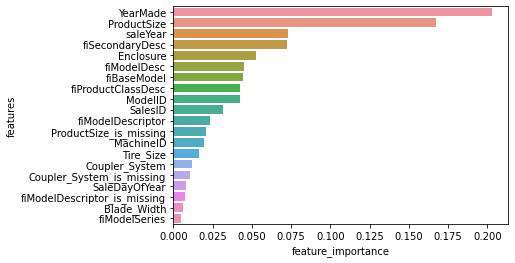

In [327]:
plot_features(x_train.columns, ideal_model.feature_importances_)